In [1]:
import pandas as pd

train_data = pd.read_csv('data/train.csv')
print(len(train_data))

test_data = pd.read_csv('data/test.csv')
print(len(test_data))

19579
8392


In [2]:
train_data.columns

Index(['id', 'text', 'author'], dtype='object')

In [3]:
from datetime import datetime as dt
start = dt.now()
train_sent_lens = []
train_EAP_sent_lens = []
train_HPL_sent_lens = []
train_MWS_sent_lens = []
for index, row in train_data.iterrows():
    sent = row[1]
    author = row[2]
    sent_length = len(sent)
    train_sent_lens.append(sent_length)
    if 'EAP' == author:
        train_EAP_sent_lens.append(sent_length)
    elif 'HPL' == author:
        train_HPL_sent_lens.append(sent_length)
    elif 'MWS' == author:
        train_MWS_sent_lens.append(sent_length)
        
end = dt.now()
t = end - start
print(len(train_sent_lens))
print(len(train_EAP_sent_lens))
print(len(train_HPL_sent_lens))
print(len(train_MWS_sent_lens))
print('Time Consume: {}'.format(t))

19579
7900
5635
6044
Time Consume: 0:00:01.582236


In [4]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(train_sent_lens, 50, facecolor='green', alpha=0.75)
plt.show()

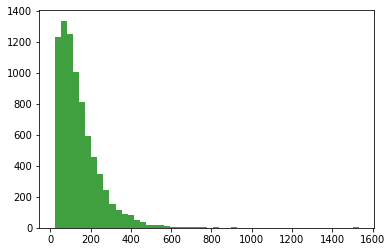

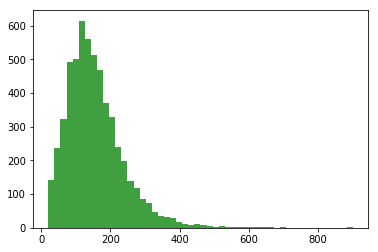

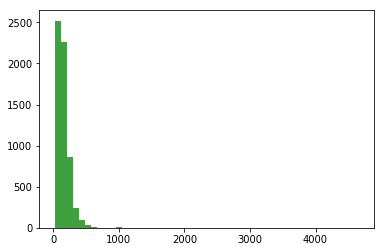

In [5]:
n, bins, patches = plt.hist(train_EAP_sent_lens, 50, facecolor='green', alpha=0.75)
plt.show()
n, bins, patches = plt.hist(train_HPL_sent_lens, 50, facecolor='green', alpha=0.75)
plt.show()
n, bins, patches = plt.hist(train_MWS_sent_lens, 50, facecolor='green', alpha=0.75)
plt.show()

In [6]:
import nltk
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [9]:
from datetime import datetime as dt
from nltk import pos_tag
start = dt.now()
noun_cnts = []
verb_cnts = []
adj_cnts = []
adv_cnts = []
others_cnts = []
for index, row in train_data.iterrows():
    noun_cnt = 0
    verb_cnt = 0
    adj_cnt = 0
    adv_cnt = 0
    other_cnt = 0
    sentence = row[1]
    pos_tags = pos_tag(sentence)
    for tag in pos_tags:
        tag_type = tag[1]
        if 'NN' in tag_type:
            noun_cnt += 1
        elif 'VB' in tag_type:
            verb_cnt += 1
        elif 'JJ' in tag_type:
            adj_cnt += 1
        elif 'RB' in tag_type:
            adv_cnt += 1
        else:
            other_cnt += 1
    noun_cnts.append(noun_cnt)
    verb_cnts.append(verb_cnt)
    adj_cnts.append(adj_cnt)
    adv_cnts.append(adv_cnt)
    others_cnts.append(other_cnt)
train_data['noun_cnt'] = pd.Series(noun_cnts)
train_data['verb_cnt'] = pd.Series(verb_cnts)
train_data['adj_cnt'] = pd.Series(adj_cnts)
train_data['adv_cnt'] = pd.Series(adv_cnts)
train_data['other_cnt'] = pd.Series(others_cnts)
train_data['sent_length'] = pd.Series(train_sent_lens)

end = dt.now()
t = end - start
print('Time Consume: {}'.format(t))

from IPython.display import display, HTML
display(train_data)

Time Consume: 0:02:49.787343


,id,text,author,noun_cnt,verb_cnt,adj_cnt,adv_cnt,other_cnt,sent_length
0,id26305,"This process, however, afforded me no means of...",EAP,148,28,27,0,28,231
1,id17569,It never once occurred to me that the fumbling...,HPL,49,8,8,0,6,71
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,126,28,22,0,24,200
3,id27763,How lovely is spring As we looked from Windsor...,MWS,135,30,18,0,23,206
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,111,21,19,0,23,174
5,id22965,"A youth passed in solitude, my best years spen...",MWS,313,55,40,1,59,468
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,81,14,17,0,16,128
7,id13515,The surcingle hung in ribands from my body.,EAP,32,3,4,0,4,43
8,id19322,I knew that you could not say to yourself 'ste...,EAP,321,59,50,0,58,488
9,id00912,I confess that neither the structure of langua...,MWS,99,15,15,0,15,144


In [13]:
cols = ['noun_cnt', 'verb_cnt', 'adv_cnt', 'adj_cnt', 'other_cnt', 'sent_length']

X = train_data[cols].as_matrix()
Y = train_data['author'].as_matrix()

In [15]:
split_ratio = 0.8
train_size = int(len(X) * split_ratio)

train_X = X[0:train_size,:]
train_Y = Y[0:train_size]

test_X = X[train_size:,:]
test_Y = Y[train_size:]

print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

15663
15663
3916
3916


In [19]:
from sklearn.ensemble import RandomForestClassifier
import multiprocessing as mp

random_seed = 23

model = RandomForestClassifier(n_jobs=mp.cpu_count(), random_state=random_seed, n_estimators=20)
model.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=12,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import confusion_matrix

predict_Y = model.predict(test_X)

print(confusion_matrix(test_Y, predict_Y))

[[807 362 397]
 [479 323 328]
 [557 329 334]]
